<h1> Practical Data Science Assignment1 </h1>

<h2> Question 1 </h2>

First import the data and combine into a dataframe for year 2015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#csvs are placed in folder, named appropriately during download
january = 'nodiverts/january.csv'
february = 'nodiverts/february.csv'
march = 'nodiverts/march.csv'
april = 'nodiverts/april.csv'
may = 'nodiverts/may.csv'
june ='nodiverts/june.csv'
july ='nodiverts/july.csv'
august ='nodiverts/august.csv'
september ='nodiverts/september.csv'
october ='nodiverts/october.csv'
november = 'nodiverts/november.csv'
december = 'nodiverts/december.csv'

#import all csv files
jan=pd.read_csv(january,usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
feb=pd.read_csv(february, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
mar=pd.read_csv(march, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
apr=pd.read_csv(april, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST','DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
may=pd.read_csv(may, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
jun=pd.read_csv(june, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
jul=pd.read_csv(july, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
sep=pd.read_csv(september, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
oct=pd.read_csv(october, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
nov=pd.read_csv(november, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})
dec=pd.read_csv(december, usecols=['MONTH','CARRIER','FLIGHTS','ORIGIN','DEST', 'DEP_DELAY_NEW'], dtype={'FLIGHTS':np.int32})

#concatenate all dataframes to one for the year 2015
frames=[jan,feb,mar,apr,may,jun,jul,sep,oct,nov,dec]
flights = pd.concat(frames,axis=0, ignore_index=True)

In [2]:
flights.sample()

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS
624065,2,WN,MSY,PHX,2.0,1


Now take care of outliers. 
Calculate total flights per airport and map it to flights DataFrame.
Make new table  and discard rows < percentile(1)

In [3]:
flights_per_airport= flights.groupby(by=['ORIGIN'])['FLIGHTS'].sum()
flights['FLIGHTS_SUM'] = flights['ORIGIN'].map(flights_per_airport)
flights_without_outlier = flights[flights.FLIGHTS_SUM > np.percentile(flights_per_airport,1)]


In [4]:
flights_without_outlier.head(10)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,98954
1,1,DL,ATL,LGA,26.0,1,345717
2,1,DL,SAN,DTW,0.0,1,69539
3,1,DL,ATL,AGS,0.0,1,345717
4,1,DL,ATL,IAH,0.0,1,345717
5,1,DL,IAH,ATL,0.0,1,146414
6,1,DL,DTW,LAS,0.0,1,108188
7,1,DL,ATL,TPA,0.0,1,345717
8,1,DL,PHX,MSP,0.0,1,146033
9,1,DL,DTW,ORD,32.0,1,108188


In [7]:
flights_without_outlier = flights_without_outlier.reset_index()

In [9]:
flights_without_outlier=flights_without_outlier.drop({'index','MONTH','CARRIER','DEST','FLIGHTS','FLIGHTS_SUM'},1)


In [10]:
flights_without_outlier.head(15)

,ORIGIN,DEP_DELAY_NEW
0,LGA,0.0
1,ATL,26.0
2,SAN,0.0
3,ATL,0.0
4,ATL,0.0
5,IAH,0.0
6,DTW,0.0
7,ATL,0.0
8,PHX,0.0
9,DTW,32.0


Now check unique # of ORIGIN of origin df flights VS flights_without_outliers

In [12]:
flights.ORIGIN.describe()

count     5308543
unique        322
top           ATL
freq       345717
Name: ORIGIN, dtype: object

In [13]:
flights_without_outlier.ORIGIN.describe()

count     5308292
unique        317
top           ATL
freq       345717
Name: ORIGIN, dtype: object

We can see that we deleted 4 airports this way.
Now to calculate probability of delay, we add a new boolean column HAS_DELAY, whose condition is DEP_DELAY_NEW > 0.0

In [14]:
flights_without_outlier.sample()

,ORIGIN,DEP_DELAY_NEW
2684248,SEA,0.0


In [15]:
flights_without_outlier['HAS_DELAY']= (flights_without_outlier['DEP_DELAY_NEW'] > 0.0)
flights_without_outlier.sample()

,ORIGIN,DEP_DELAY_NEW,HAS_DELAY
1142997,ORD,6.0,True


In [16]:
flights_without_outlier = flights_without_outlier.drop(['DEP_DELAY_NEW'],1)

In [17]:
flights_without_outlier.sample()

,ORIGIN,HAS_DELAY
1280316,HNL,False


Make a new groupedby object that has index ORIGIN so we can calculate Delay(True) vs non-Delay(False = 0.0)

In [18]:
groupedby=flights_without_outlier.groupby(['ORIGIN','HAS_DELAY']).size()

In [19]:
groupedby=groupedby.unstack()

In [20]:
groupedby.head(10)

HAS_DELAY,False,True
ORIGIN,,
ABE,1681,599
ABI,1753,567
ABQ,12038,7033
ABR,533,147
ABY,672,211
ACK,219,163
ACT,1227,385
ACV,926,393
ACY,2371,1108


In [21]:
groupedby['Probability of delay'] = groupedby[1] / (groupedby[1] + groupedby[0])

In [22]:
groupedby = groupedby.sort_values('Probability of delay',ascending=False)

In [23]:
groupedby

HAS_DELAY,False,True,Probability of delay
ORIGIN,,,
GUM,125,209,0.625749
ADK,43,53,0.552083
ILG,45,55,0.550000
DAL,28865,30961,0.517517
MVY,77,77,0.500000
MDW,40696,39879,0.494930
HOU,26827,25039,0.482763
BWI,44610,41153,0.479846
DEN,107450,87875,0.449891


Now to find the mean and median of delay per each airport. Use a df that consists of ORIGIN and DEP_DELAY_NEW, discard delays <= 0.0 and create a groupedby object, requesting the aggregates of mean and median.

In [53]:
flights_without_outlier = flights[flights.FLIGHTS_SUM > np.percentile(flights_per_airport,1)]
flights_without_outlier.head(10)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,98954
1,1,DL,ATL,LGA,26.0,1,345717
2,1,DL,SAN,DTW,0.0,1,69539
3,1,DL,ATL,AGS,0.0,1,345717
4,1,DL,ATL,IAH,0.0,1,345717
5,1,DL,IAH,ATL,0.0,1,146414
6,1,DL,DTW,LAS,0.0,1,108188
7,1,DL,ATL,TPA,0.0,1,345717
8,1,DL,PHX,MSP,0.0,1,146033
9,1,DL,DTW,ORD,32.0,1,108188


In [44]:
flights_without_outlier = flights_without_outlier.drop({'MONTH','CARRIER','DEST','FLIGHTS','FLIGHTS_SUM'},1)

In [47]:
flights_without_outlier=flights_without_outlier.reset_index()


In [50]:
flights_without_outlier = flights_without_outlier.drop(['index'],1)

In [52]:
flights_without_outlier.head(10)

,ORIGIN,DEP_DELAY_NEW
0,LGA,0.0
1,ATL,26.0
2,SAN,0.0
3,ATL,0.0
4,ATL,0.0
5,IAH,0.0
6,DTW,0.0
7,ATL,0.0
8,PHX,0.0
9,DTW,32.0


In [58]:
flights_with_delay = flights_without_outlier[(flights_without_outlier['DEP_DELAY_NEW'] > 0.0)]

In [59]:
flights_with_delay

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
1,1,DL,ATL,LGA,26.0,1,345717
9,1,DL,DTW,ORD,32.0,1,108188
10,1,DL,ORD,DTW,6.0,1,285387
12,1,DL,PHL,ATL,6.0,1,65700
14,1,DL,BWI,ATL,2.0,1,85763
19,1,DL,ATL,BOS,1.0,1,345717
26,1,DL,LAX,DTW,4.0,1,193136
35,1,DL,ATL,DTW,57.0,1,345717
36,1,DL,FLL,LGA,6.0,1,73315
38,1,DL,DEN,ATL,3.0,1,195325


In [60]:
flights_with_delay = flights_with_delay.drop({'MONTH', 'CARRIER', 'DEST', 'FLIGHTS','FLIGHTS_SUM'},1)

In [130]:
flights_with_delay.head(10)

,ORIGIN,DEP_DELAY_NEW
0,ATL,26.0
1,DTW,32.0
2,ORD,6.0
3,PHL,6.0
4,BWI,2.0
5,ATL,1.0
6,LAX,4.0
7,ATL,57.0
8,FLL,6.0
9,DEN,3.0


In [62]:
flights_with_delay = flights_with_delay.reset_index()

In [64]:
flights_with_delay= flights_with_delay.drop(['index'],1)

In [65]:
flights_with_delay

,ORIGIN,DEP_DELAY_NEW
0,ATL,26.0
1,DTW,32.0
2,ORD,6.0
3,PHL,6.0
4,BWI,2.0
5,ATL,1.0
6,LAX,4.0
7,ATL,57.0
8,FLL,6.0
9,DEN,3.0


In [66]:
flights_with_delay.ORIGIN.describe()

count     1934664
unique        317
top           ATL
freq       126689
Name: ORIGIN, dtype: object

Now combine to groupbyorigin

groupedbyorigin = flights_with_delay.groupby(['ORIGIN']).agg(['mean','median])

In [68]:
groupedbyorigin = flights_with_delay.groupby(['ORIGIN']).agg(['mean','median'])

In [69]:
groupedbyorigin

DEP_DELAY_NEW       
                mean median
ORIGIN                     
ABE        45.747913   17.0
ABI        45.502646   19.0
ABQ        30.929049   14.0
ABR        59.782313   18.0
ABY        53.208531   29.0
ACK        48.361963   22.0
ACT        48.446753   23.0
ACV        51.620865   35.0
ACY        38.860108   17.5
ADK        26.320755   18.0
ADQ        24.194444   10.0
AEX        50.515113   22.0
AGS        38.715125   16.0
ALB        32.292444   13.0
ALO        48.880342   27.0
AMA        37.669943   15.0
ANC        27.265981   11.0
APN        72.707865   45.0
ASE        52.518203   29.0
ATL        28.483665   13.0
ATW        40.185776   18.0
AUS        32.305521   12.0
AVL        43.721290   15.0
AVP        46.351801   15.0
AZO        49.086687   28.0
BDL        30.619833   12.0
BET        28.383065   12.0
BFL        51.938959   28.0
BGM        75.098361   29.0
BGR        53.272727   11.5
...              ...    ...
SRQ        39.517986   16.0
STC        65.214286   50.0
STL        30.497731   14.0
STT        45.971937   18.0
STX        35.291667   15.0
SUN        42.187500   18.5
SUX        53.458904   24.5
SWF        44.382075   21.0
SYR        45.930060   20.0
TLH        40.491720   16.0
TOL        48.254658   29.0
TPA        33.493004   14.0
TRI        37.458599   16.0
TTN        55.256008   23.0
TUL        36.033763   15.0
TUS        33.609206   15.0
TVC        44.073345   19.0
TWF        27.422222    9.0
TXK        38.404000   16.5
TYR        44.458545   19.0
TYS        42.325939   18.0
UST        36.544118   19.5
VEL       133.600000   20.0
VLD        42.157635   19.0
VPS        47.503828   19.0
WRG        37.244681   17.5
WYS        26.852941    7.0
XNA        50.352683   22.0
YAK        32.626984   19.0
YUM        37.346479   11.0

[317 rows x 2 columns]

Combine results of probability and mean/median

In [71]:
framesfinal = [groupedby,groupedbyorigin]


In [128]:
resultq1 = pd.concat(framesfinal,axis=1)


<h4> Final Table </h4>

In [129]:
resultq1 = resultq1.sort_values('Probability of delay',ascending=False)
resultq1.head(20)


HAS_DELAY,False,True,Probability of delay,"(DEP_DELAY_NEW, mean)","(DEP_DELAY_NEW, median)"
GUM,125,209,0.625749,27.172249,11.0
ADK,43,53,0.552083,26.320755,18.0
ILG,45,55,0.550000,58.345455,30.0
DAL,28865,30961,0.517517,25.551856,12.0
MVY,77,77,0.500000,50.896104,21.0
MDW,40696,39879,0.494930,26.883748,13.0
HOU,26827,25039,0.482763,26.982547,13.0
BWI,44610,41153,0.479846,29.523097,14.0
DEN,107450,87875,0.449891,30.096159,14.0
PBG,148,120,0.447761,38.725000,23.0




<h2> Question 2 </h2>


In [75]:
flights

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,98954
1,1,DL,ATL,LGA,26.0,1,345717
2,1,DL,SAN,DTW,0.0,1,69539
3,1,DL,ATL,AGS,0.0,1,345717
4,1,DL,ATL,IAH,0.0,1,345717
5,1,DL,IAH,ATL,0.0,1,146414
6,1,DL,DTW,LAS,0.0,1,108188
7,1,DL,ATL,TPA,0.0,1,345717
8,1,DL,PHX,MSP,0.0,1,146033
9,1,DL,DTW,ORD,32.0,1,108188


In [76]:
flights_per_carrier = flights.drop({'MONTH','ORIGIN','DEST','FLIGHTS','FLIGHTS_SUM'},1)

In [78]:
flights_per_carrier['HAS_DELAY'] = (flights_per_carrier['DEP_DELAY_NEW'] > 0.0)

In [79]:
flights_per_carrier

,CARRIER,DEP_DELAY_NEW,HAS_DELAY
0,DL,0.0,False
1,DL,26.0,True
2,DL,0.0,False
3,DL,0.0,False
4,DL,0.0,False
5,DL,0.0,False
6,DL,0.0,False
7,DL,0.0,False
8,DL,0.0,False
9,DL,32.0,True


In [80]:
flights_per_carrier2 = flights_per_carrier.drop(['DEP_DELAY_NEW'],1)

In [81]:
flights_per_carrier2

,CARRIER,HAS_DELAY
0,DL,False
1,DL,True
2,DL,False
3,DL,False
4,DL,False
5,DL,False
6,DL,False
7,DL,False
8,DL,False
9,DL,True


In [106]:
groupedbycarrier = flights_per_carrier2.groupby(['CARRIER','HAS_DELAY']).size()

In [107]:
groupedbycarrier = groupedbycarrier.unstack()

In [108]:
groupedbycarrier

HAS_DELAY,False,True
CARRIER,,
AA,428501,217735
AS,117784,38642
B6,151355,91867
DL,539234,255700
EV,367298,156125
F9,50434,32260
HA,51564,17807
MQ,184123,86628
NK,60273,46674


In [109]:
groupedbycarrier['Probability of delay'] = groupedbycarrier[1] / (groupedbycarrier[1] + groupedbycarrier[0])

In [119]:
groupedbycarrier.head(10)

HAS_DELAY,False,True,Probability of delay
CARRIER,,,
UA,236899,233411,0.496292
WN,635139,518537,0.449465
NK,60273,46674,0.436422
F9,50434,32260,0.390113
B6,151355,91867,0.377708
VX,35081,21134,0.375949
AA,428501,217735,0.336928
DL,539234,255700,0.321662
MQ,184123,86628,0.319954


In [111]:
groupedbycarrier = groupedbycarrier.sort_values('Probability of delay',ascending=False)

Probability table of delay per carrier,descending order

In [112]:
groupedbycarrier.head(10)

HAS_DELAY,False,True,Probability of delay
CARRIER,,,
UA,236899,233411,0.496292
WN,635139,518537,0.449465
NK,60273,46674,0.436422
F9,50434,32260,0.390113
B6,151355,91867,0.377708
VX,35081,21134,0.375949
AA,428501,217735,0.336928
DL,539234,255700,0.321662
MQ,184123,86628,0.319954


Now to find the mean and median delays per carrier

In [92]:
flights_per_carrier

,CARRIER,DEP_DELAY_NEW,HAS_DELAY
0,DL,0.0,False
1,DL,26.0,True
2,DL,0.0,False
3,DL,0.0,False
4,DL,0.0,False
5,DL,0.0,False
6,DL,0.0,False
7,DL,0.0,False
8,DL,0.0,False
9,DL,32.0,True


In [113]:
flights_per_carrier3 = flights_per_carrier.drop({'HAS_DELAY'},1)

In [114]:
flights_per_carrier3 = flights_per_carrier3[(flights_per_carrier3['DEP_DELAY_NEW'] > 0.0 )]

In [115]:
flights_per_carrier3 = flights_per_carrier3.reset_index()

In [117]:
flights_per_carrier3= flights_per_carrier3.drop(['index'],1)

In [120]:
groupedbycarriermm = flights_per_carrier3.groupby(['CARRIER']).agg(['mean','median'])

In [123]:
framesfinalq2 = [groupedbycarrier,groupedbycarriermm]
resultq2 = pd.concat(framesfinalq2, axis=1)

In [126]:
resultq2 = resultq2.sort_values('Probability of delay', ascending=False)

Final table for Question2

In [127]:
resultq2.head(20)

HAS_DELAY,False,True,Probability of delay,"(DEP_DELAY_NEW, mean)","(DEP_DELAY_NEW, median)"
UA,236899,233411,0.496292,32.704988,13.0
WN,635139,518537,0.449465,26.695605,13.0
NK,60273,46674,0.436422,41.381347,21.0
F9,50434,32260,0.390113,44.839523,21.0
B6,151355,91867,0.377708,37.357604,18.0
VX,35081,21134,0.375949,30.481404,13.0
AA,428501,217735,0.336928,34.429412,15.0
DL,539234,255700,0.321662,29.641122,11.0
MQ,184123,86628,0.319954,40.297467,21.0
US,136150,62565,0.314848,28.500615,13.0


<h2> Question 3</h2>

Create a new groupby object from the original DataFrame flights, unstack it, and use describe() to get min & max values which will be used as an input to numpy.linspace() function

In [134]:
flights_per_airport_q3 = flights.groupby(['ORIGIN','FLIGHTS']).size()

In [136]:
flights_per_airport_q3 = flights_per_airport_q3.unstack()

In [138]:
flights_per_airport_q3.describe()

FLIGHTS,1
count,322.000000
mean,16486.158385
std,40301.230270
min,34.000000
25%,883.000000
50%,2579.500000
75%,9178.250000
max,345717.000000


In [140]:
import matplotlib.pyplot as plt

In [141]:
import matplotlib
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1789AC908>]], dtype=object)

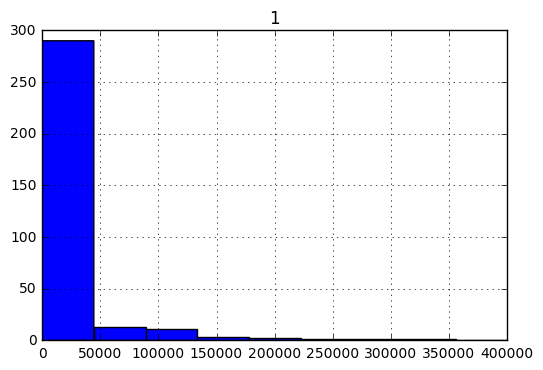

In [154]:
flights_per_airport_q3.hist(bins=np.linspace(0., 400000., 10))

<h2> Question 4 </h2>

In [220]:
flights.head(5)

,MONTH,CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,FLIGHTS,FLIGHTS_SUM
0,1,DL,LGA,MCO,0.0,1,98954
1,1,DL,ATL,LGA,26.0,1,345717
2,1,DL,SAN,DTW,0.0,1,69539
3,1,DL,ATL,AGS,0.0,1,345717
4,1,DL,ATL,IAH,0.0,1,345717


In [186]:
flights_temporal = flights.groupby(['MONTH','FLIGHTS_SUM']).size()

In [187]:
flights_temporal = flights_temporal.unstack()
flights_temporal

FLIGHTS_SUM,34,52,55,83,96,100,105,154,156,190,...,111079,133171,146033,146414,147588,193136,195325,238297,285387,345717
MONTH,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,58.0,9.0,26.0,10.0,NaN,52.0,60.0,...,8903.0,11604.0,13122.0,13376.0,12891.0,17340.0,17090.0,23153.0,23484.0,29512.0
2,6.0,NaN,NaN,25.0,8.0,21.0,8.0,NaN,54.0,56.0,...,8217.0,10570.0,11916.0,12231.0,11569.0,15762.0,15642.0,20839.0,21812.0,27366.0
3,NaN,NaN,NaN,NaN,9.0,28.0,9.0,NaN,66.0,62.0,...,9946.0,12397.0,14526.0,14045.0,13422.0,18014.0,18609.0,23224.0,26129.0,32754.0
4,6.0,NaN,NaN,NaN,9.0,25.0,8.0,NaN,23.0,12.0,...,10018.0,12103.0,13746.0,13507.0,13019.0,17408.0,17509.0,21867.0,25805.0,31370.0
5,NaN,NaN,NaN,NaN,9.0,NaN,9.0,16.0,13.0,NaN,...,10485.0,12744.0,13803.0,14415.0,13543.0,17977.0,18106.0,22160.0,26871.0,32398.0
6,NaN,13.0,72.0,NaN,8.0,NaN,11.0,89.0,13.0,NaN,...,11365.0,12362.0,13871.0,14199.0,13846.0,18533.0,18667.0,22573.0,27591.0,32735.0
7,NaN,31.0,93.0,NaN,9.0,NaN,14.0,115.0,13.0,NaN,...,11814.0,12687.0,14274.0,14029.0,14444.0,19371.0,19076.0,22895.0,28223.0,33735.0
9,NaN,8.0,NaN,NaN,8.0,NaN,8.0,77.0,13.0,NaN,...,10138.0,12029.0,12023.0,12167.0,13326.0,17499.0,17397.0,20334.0,26163.0,31333.0
10,NaN,NaN,NaN,NaN,9.0,NaN,9.0,11.0,14.0,NaN,...,10584.0,12688.0,12921.0,13211.0,14170.0,17728.0,18136.0,21044.0,27652.0,32588.0


In [191]:
flights_temporal['TOTAL_FLIGHTS'] = flights_temporal[0:292].sum(axis=1)

In [226]:
flights_q1 = flights.drop({'CARRIER','ORIGIN','DEST','FLIGHTS'},1)

In [230]:
flights_q1 =flights_q1.drop(flights_q1['FLIGHTS_SUM'])

In [232]:
flights_q1['HAS_DELAY'] = (flights_q1['DEP_DELAY_NEW'] > 0.0)

In [233]:
flights_q1

,MONTH,DEP_DELAY_NEW,FLIGHTS_SUM,HAS_DELAY
0,1,0.0,98954,False
1,1,26.0,345717,True
2,1,0.0,69539,False
3,1,0.0,345717,False
4,1,0.0,345717,False
5,1,0.0,146414,False
6,1,0.0,108188,False
7,1,0.0,345717,False
8,1,0.0,146033,False
9,1,32.0,108188,True


In [236]:
flights_q1 = flights_q1.drop(['DEP_DELAY_NEW'],1)

In [238]:
flights_q1

,MONTH,FLIGHTS_SUM,HAS_DELAY
0,1,98954,False
1,1,345717,True
2,1,69539,False
3,1,345717,False
4,1,345717,False
5,1,146414,False
6,1,108188,False
7,1,345717,False
8,1,146033,False
9,1,108188,True


In [239]:
groupedbymonth = flights_q1.groupby(['MONTH','HAS_DELAY']).size()

In [242]:
groupedbymonth = groupedbymonth.unstack()

In [243]:
groupedbymonth


HAS_DELAY,False,True
MONTH,,
1,293110,176565
2,255749,173442
3,310495,193817
4,317837,167314
5,318137,178856
6,288516,215381
7,311099,209619
9,332355,132591
10,341063,145102


In [244]:
flights_temporal

FLIGHTS_SUM,34,52,55,83,96,100,105,154,156,190,...,133171,146033,146414,147588,193136,195325,238297,285387,345717,TOTAL_FLIGHTS
MONTH,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,58.0,9.0,26.0,10.0,NaN,52.0,60.0,...,11604.0,13122.0,13376.0,12891.0,17340.0,17090.0,23153.0,23484.0,29512.0,469968.0
2,6.0,NaN,NaN,25.0,8.0,21.0,8.0,NaN,54.0,56.0,...,10570.0,11916.0,12231.0,11569.0,15762.0,15642.0,20839.0,21812.0,27366.0,429191.0
3,NaN,NaN,NaN,NaN,9.0,28.0,9.0,NaN,66.0,62.0,...,12397.0,14526.0,14045.0,13422.0,18014.0,18609.0,23224.0,26129.0,32754.0,504312.0
4,6.0,NaN,NaN,NaN,9.0,25.0,8.0,NaN,23.0,12.0,...,12103.0,13746.0,13507.0,13019.0,17408.0,17509.0,21867.0,25805.0,31370.0,485151.0
5,NaN,NaN,NaN,NaN,9.0,NaN,9.0,16.0,13.0,NaN,...,12744.0,13803.0,14415.0,13543.0,17977.0,18106.0,22160.0,26871.0,32398.0,496993.0
6,NaN,13.0,72.0,NaN,8.0,NaN,11.0,89.0,13.0,NaN,...,12362.0,13871.0,14199.0,13846.0,18533.0,18667.0,22573.0,27591.0,32735.0,503897.0
7,NaN,31.0,93.0,NaN,9.0,NaN,14.0,115.0,13.0,NaN,...,12687.0,14274.0,14029.0,14444.0,19371.0,19076.0,22895.0,28223.0,33735.0,520718.0
9,NaN,8.0,NaN,NaN,8.0,NaN,8.0,77.0,13.0,NaN,...,12029.0,12023.0,12167.0,13326.0,17499.0,17397.0,20334.0,26163.0,31333.0,464946.0
10,NaN,NaN,NaN,NaN,9.0,NaN,9.0,11.0,14.0,NaN,...,12688.0,12921.0,13211.0,14170.0,17728.0,18136.0,21044.0,27652.0,32588.0,486165.0


In [272]:
flights_temporal2 = flights_temporal['TOTAL_FLIGHTS']

In [274]:
flights_temporal2

MONTH
1     469968.0
2     429191.0
3     504312.0
4     485151.0
5     496993.0
6     503897.0
7     520718.0
9     464946.0
10    486165.0
11    467972.0
12    479230.0
Name: TOTAL_FLIGHTS, dtype: float64